In [1]:
%matplotlib inline     
# ^Sans animations
# %matplotlib notebook 
# ^Avec animations
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

 **Remplissage d'une bibliothèque**
 

Nous allons modeliser l'évolution de l'affluence dans la bibliothèque des Licences au cours du temps.

Nous disposons des horaires et du nombre de place de la bibliothèque 

In [2]:
# aff : le taux d'affluence actuelle
# afflim : le taux d'affluence à partir duquel la personne hésite
# p1 : la probabilité que la personne ne rentre pas dans la bibliothèque

def alea_entree(aff,afflim,p1):
    '''
    float->int
    en fonction du taux d'affluence et d'une probabilité ,retourne 1 si l'élève rentre, sinon 0.
    '''
    if aff>=afflim :
        u = np.random.random() # u est un nombre aléatoire entre 0 et 1
        if u < p1: 
            return 0
    return 1

In [3]:
# aff : le taux d'affluence actuelle
# afflim : le taux d'affluence à partir duquel la personne hésite
# p2 : la probabilité que la personne ne sort pas de la bibliothèque

p2 =.95
def alea_sortie(aff,afflim,p2):
    '''
    float->int
    en fonction du taux d'affluence et d'une probabilité p2,retourne 1 si l'élève sort, sinon 0 0.
    '''
    if aff>=afflim :
        u = np.random.random()  # u est un nombre aléatoire entre 0 et 1
        if u < p2: 
            return 0
        else:
            return 1
    return 0

In [32]:
#bt0: nombre initial de personne dans la bibliothèque. 
#btmax: nombre de places de la bibliothèque.
# aff : le taux d'affluence actuelle
# afflim : le taux d'affluence à partir duquel la personne hésite
# p1 : la probabilité que la personne ne rentre pas dans la bibliothèque
# p2 : la probabilité que la personne ne sort pas de la bibliothèque
#n : nombre de cycle entrée/sortie

def bibliothèque(bt0,btmax,afflim,p1,p2,n):
    ''' hyp : bt0 <= btmax
        Evolution du nombre de place occupé dans la bibliothèque.'''
    
    bt=bt0
    aff=bt/btmax
    L=[bt0] #Evolution de l'occupation
    for i in range(n):
        a = alea_entree(aff,afflim,p1)
        b = alea_sortie(aff,afflim,p2)
        if bt < btmax:
            bt += a
        if bt>0:
            bt-=b
        L.append(bt)
        aff=bt/btmax
    return L
        
        
        
        

affichons la courbe de l'évolution de l'occupation de la bibliothèque sur un nombre de tour

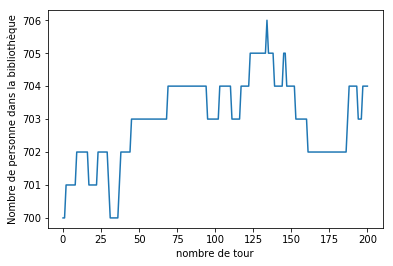

In [34]:
def plotb0(L):
    plt.figure()
    plt.plot(L)
    plt.ylabel("Nombre de personne dans la bibliothèque")
    plt.xlabel("nombre de tour")
    plt.show()
    return
plotb0(bibliothèque(700,745,.8,.9,.95,200))

Nous allons coder ci-dessous les fonctions de conversion dont nous aurons besoin.

*** changement de format pour les jours de la semaine ***

"jour" -> int

In [158]:
def conversion1_jour(jour):
    ''' str * dict -> int
        Conversion : str -> int pour les jours de la semaine '''
    Jour1 = {'lundi':0,'mardi':1,'mercredi':2,'jeudi':3,'vendredi':4,'samedi':5,'dimanche':6}
    return (Jour1[jour])

In [159]:
conversion1("lundi")

0

int -> "jour"

In [160]:
def conversion2_jour(jour):
    ''' int -> str
        Conversion : int -> str pour les jours de la semaine '''
    Jour2 = {0:'lundi' ,1:'mardi',2:'mercredi',3:'jeudi',4:'vendredi',5:'samedi',6:'dimanche'}
    return (Jour2[jour])

In [161]:
conversion2_jour(0)

'lundi'

*** changement de format pour l'heure ***

"heure minute seconde"  -> float(4 décimales)

In [180]:
def conversion1_heure(heure_format):
    ''' str -> float
        Conversion : heure/minute/seconde -> float'''
    Hentree = list(map(int,heure_format.split()))
    seconde = 0
    p= 2
    for i in Hentree:
        seconde += i * pow(60,p)
        p-=1
    return ( round(seconde/3600,4) )

In [181]:
# 12 h 42 et 5 secondes
conversion1_heure("12 42 5")

12.7014

float(4 décimales) -> "heure minute seconde"

In [182]:
def conversion2_heure(heure_format):
    '''float -> str
       Conversion : float -> heure/minute/seconde'''
    H = ''
    heure = int(heure_format)
    seconde = round( (heure_format - heure) * 3600 )
    H += str(heure) + ' ' + str(seconde//60) + ' ' + str(seconde%60)
    return H

In [184]:
conversion2_heure(1.5)

'1 30 0'

Ici nous etudions l'evolution du remplissage de la bibliothèque en fonction du temps 

In [78]:
# Exemple : horaire pour la BDL
horaire = [(9,22) , (9,22) , (9,22) , (9,22) , (9,22) , (10,20),(0,0)]

def est_ouvert(heure,jour,horaire):
    '''float * str * dict[tuple] -> bool
    indique si la bibliotheque est ouverte ou fermée en fonction de l'heure actuelle 'heure', 
    du jour de la semaine 'jour' et des horaires d'ouverture 'horaire'  '''
    j = conversion1_jour(jour)
    date = horaire[j]
    if date!= (0,0):
        ouverture = date[0]
        fermeture = date[1]
        return ouverture <= heure < fermeture
    return False

In [79]:
# Exemple : On teste si la bibliothèque est ouverte le lundi à 11h.
print( est_ouvert(11,'lundi',horaire) )

True


Nouvelle modélisation en tenant compte du paramètre horaire.
De plus, nous introduirons trois nouvelles fonctions : nb_entre, nb_sortie et aff_actu.


***Nous avons collecté les affluences de la bibliothèque des licences pour une semaine.
Avec notre modèle, nous allons essayer de retrouver ces données.***

In [49]:
#affluence selon l'heure et le jour. Toutes les listes ont le même nombre d'éléments.
#On comble les trous s'il y en a.(samedi)

semaine = {'lundi' : [0.17, 0.33, 0.42, 0.5, 0.58, 0.58, 0.67, 0.75, 0.83, 0.92, 0.75, 0.5, 0.25] , 
 'mardi' : [0.08, 0.17, 0.25, 0.33, 0.42, 0.42, 0.42, 0.5, 0.58, 0.58, 0.5, 0.33, 0.17] , 
 'mercredi' : [0.17, 0.33, 0.42, 0.5, 0.5, 0.5, 0.58, 0.58, 0.58, 0.5, 0.33, 0.25, 0.08] ,
 'jeudi' : [0.08, 0.17, 0.25, 0.33, 0.5, 0.58, 0.5, 0.5, 0.67, 0.75, 0.67, 0.42, 0.17] , 
 'vendredi' : [0.08, 0.25, 0.5, 0.58, 0.67, 0.83, 0.83, 0.67, 0.67, 0.67, 0.67, 0.42, 0.17] , 
 'samedi' : [0,0.25, 0.75, 0.58, 0.75, 0.92, 0.83, 0.83, 1.0, 0.75, 0.25,0,0] }

In [188]:
def aff_actu(heure,jour):
    ''' float * str -> float
        retourne l'affluence actuelle à une heure donnée dans une bibliothèque
        Si la bibliothèque est fermée retourne 0'''
    if est_ouvert(heure,jour,horaire):
        x=semaine[jour][int(heure-9)]
        return x
    return 0
aff_actu(10,"samedi")

0.25

*** nb_entre et nb_sortie devront tenir compte de t !!!!!!!!!!! ***

In [10]:
#tirage aléatoire du nombre d'entrée

# aff : le taux d'affluence actuelle
# afflim : le taux d'affluence à partir duquel la personne hésite
# p1 : la probabilité que la personne ne rentre pas dans la bibliothèque
#emax : nombre de place restant
#t: heure actuelle
#nb: nombre de tirage
# s: nombre de personnes qui entrent
# phase : découpage de la journée en plusieurs phases

def nb_entre(aff,afflim,p1,emax):
    s=0
    nb= 10
    nb=np.random.randint(0,nb)
    if nb>emax:
        nb = emax
    for i in range(nb):
        s += alea_entree(aff,afflim,p1)
    return s


In [11]:
#idem que pour nb_entre

def nb_sortie(aff,afflim,p2,bt):
    s=0
    nb= 10
    nb=np.random.randint(0,nb)
    if nb>bt:
        nb = bt 
        
    for i in range(nb):
        s += alea_sortie(aff,afflim,p2)
    return s


In [ ]:
*** C'est pour cela que les deux foncti beuguent !!!!!!!!!!! 

In [12]:
# Bibliothèquetemp permet  en fonction des horaires d'ouverture de la bibliothèque
# et de l'heure de la journée de faire des entrée/sortie multiple.

#bt0: nombre initial de personne dans la bibliothèque. 
# bt : nombre de personne dans la bibliothèque à l'instant t
#btmax: nombre de places de la bibliothèque.
# aff : le taux d'affluence actuelle
# afflim : le taux d'affluence à partir duquel la personne hésite
# p1 : la probabilité que la personne ne rentre pas dans la bibliothèque
# p2 : la probabilité que la personne ne sort pas de la bibliothèque
# On fera un cycle de 24h

# Exemple : horaire pour la BDL
horaire = [(9,22) , (9,22) , (9,22) , (9,22) , (9,22) , (10,20),(0,0)]

def bibliothèquetemp(bt0,btmax,afflim,p1,p2,jour):
                    #(int,int,float,float,float,int)
    ''' hyp : bt0 <= bt'''
    bt=bt0
    aff=bt/btmax
    L=[bt0]
    for t in range(24):
        if est_ouvert(t,jour,horaire):
            emax = btmax-bt
            a = nb_entre(aff,afflim,p1,emax,t)
            b = nb_sortie(aff,afflim,p2,bt,t)
            if bt < btmax:
                bt += a
            if bt>0:
                bt-=b
        else:
            bt=0
        L.append(bt)
        aff=bt/btmax
    return L
        
    


affichons la courbe

In [190]:
def plotb1(L):
    plt.figure()
    plt.plot(L)
    plt.ylabel("Nombre de personne dans la bibliothèque")
    plt.xlabel("nombre d'heures")
    plt.xticks([i for i in range(0,25,2)])
    plt.show()
    return 
plotb1(bibliothèquetemp(0,745,.8,.9,.95,"lundi"))
                      #(bt0,btmax,afflim,p1,p2,jour)

TypeError: nb_entre() takes 4 positional arguments but 5 were given

#t0,btmax,afflim,p1,p2,n

nous voyons que plus la probabilité p1 de ne pas entrer est plus grande


**sortie et entrée aléatoire multiple:**

Nous allons améliorer notre modèle en découpant une journée en plusieurs phases  : 

'bigenter' : période d'importante entrée 

'bigexit' : période d'importante sortie 

'bigstay' : période avec flux (entrée et/ou sortie) très faible 

'unknown' : période de flux inconnu (ce sont les heures qui restent)

NB : Les phases peuvent être cumulées (attention aux incompatibilités!)

In [14]:
# On suppose que phase est valide

phase = {'bigenter': [(10,11) , (17,19)] ,  # (arrivée) , (fin des cours)
         'bigexit' : [(12,13) , (21,22)]  , # (déjeuner), (retour chez soi)
         'bigstay':  [(9,10) , (11,12) , (14,17)] , # (arrivée) , (cours) , (cours)
         'unknown':  [(13,14) , (20,21)]  } 

In [15]:
def decoupage(phase,heure):
    ''' dict -> str
        retourne la phase correspondante à l'heure
        hyp : est_ouvert(heure...) == True '''
    for cle in phase:
        for couple in phase[cle]:
            debut=couple[0] 
            fin=couple[1]
            if debut <= heure < fin:
                return cle
    return 'error'
decoupage(phase,13.5)            
            
        

'unknown'

In [16]:
def correction(nb,bt,emax):
    #correction des erreurs
    if nb >= 0:
        if nb>emax:
            nb = emax
    else:
        if -nb > bt:
            nb = -bt    

In [ ]:
def nb_flux(aff,afflim,p1,p2,emax,Nom_phase):
                
    if Nom_phase == bigenter:#a>20
        nbtir=100
    
        
    for i in range(nbtir):



    a=a-


  
            
            
            
            
#tirage aléatoire du nombre d'entrée

# aff : le taux d'affluence actuelle
# afflim : le taux d'affluence à partir duquel la personne hésite
# p1 : la probabilité que la personne ne rentre pas dans la bibliothèque
#emax : nombre de place restant
#t: heure actuelle
#nb: nombre de tirage
# s: nombre de personnes qui entrent
# phase : découpage de la journée en plusieurs phases

def nb_entre(aff,afflim,p1,emax):
    s=0
    nb= 10
    nb=np.random.randint(0,nb)
    if nb>emax:
        nb = emax
    for i in range(nb):
        s += alea_entree(aff,afflim,p1)
    return s
#idem que pour nb_entre

def nb_sortie(aff,afflim,p2,bt):
    s=0
    nb= 10
    nb=np.random.randint(0,nb)
    if nb>bt:
        nb = bt
    for i in range(nb):
        s += alea_sortie(aff,afflim,p2)
    return s

                    

In [ ]:
# Bibliothèquetemp permet  en fonction des horaires d'ouverture de la bibliothèque
# et de l'heure de la journée de faire des entrée/sortie multiple.

#bt0: nombre initial de personne dans la bibliothèque. 
# bt : nombre de personne dans la bibliothèque à l'instant t
#btmax: nombre de places de la bibliothèque.
# aff : le taux d'affluence actuelle
# afflim : le taux d'affluence à partir duquel la personne hésite
# p1 : la probabilité que la personne ne rentre pas dans la bibliothèque
# p2 : la probabilité que la personne ne sort pas de la bibliothèque
# emax : nombre place restant

# On fera un cycle de 24h

# Exemple : horaire pour la BDL
horaire = [(9,22) , (9,22) , (9,22) , (9,22) , (9,22) , (10,20),(0,0)]

# On suppose que phase est valide.

#découpage de la journée en plusieurs phases

phase = {'bigenter': [(10,11) , (17,19)] ,  # (arrivée) , (fin des cours)
         'bigexit' : [(12,13) , (21,22)]  , # (déjeuner), (retour chez soi)
         'bigstay':  [(9,10) , (11,12) , (14,17)] , # (arrivée) , (cours) , (cours)
         'unknown':  [(13,14) , (20,21)]  } 

def bibliothèquetemp(bt0,btmax,afflim,p1,p2,jour):
                    #(int,int,float,float,float,int)
    ''' hyp : bt0 <= bt'''
    bt=bt0
    aff=bt/btmax
    L=[bt0]
    for t in range(24):
        if est_ouvert(t,jour,horaire):
            Nom_phase = decoupage(phase,t)
            
            emax = btmax-bt
            
            #regarder nb_flux()
            nb=nb_flux(aff,afflim,p1,p2,emax,Nom_phase,t,emax)
            
               
                
        else:
            bt=0
        L.append(bt)
        aff=bt/btmax
    return L
        